# Problem 1 - Parse TXT file to CSV file

In [1]:
import csv
import pandas as pd
import numpy as np

FILE_PATH='acm.csv'

def yield_file_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

def process_entry(lines):
    publication = {}
    for line in lines:
        if line.startswith('#*'):
            publication['Title'] = line[2:].strip()
        elif line.startswith('#c'):
            publication['Venue'] = line[2:].strip()
        elif line.startswith('#t'):
            publication['Year'] = line[2:].strip()
        elif line.startswith('#@'):
            publication['Authors'] = line[2:].strip()
        elif line.startswith('#index'):
            publication['Index'] = line[6:].strip()

        elif line.startswith('#%'):
            references = publication.get('References', [])
            references.append(line[2:].strip())
            publication['References'] = references
    return publication


def parse_file_csv(input_path, output_path):
    c_line = []

    with open(output_path, 'w', newline='') as csvfile:
        fieldnames = ['Title', 'Authors', 'Year', 'Venue', 'Index', 'References']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for line in yield_file_lines(input_path):
            if line.startswith('#*') and c_line:
                publication = process_entry(c_line)
                if 'References' in publication:
                    publication['References'] = ', '.join(publication['References'])
                writer.writerow(publication)
                c_line = []

            c_line.append(line)

        if c_line:
            publication = process_entry(c_line)
            if 'References' in publication:
                publication['References'] = ', '.join(publication['References'])
            writer.writerow(publication)

parse_file_csv('acm.txt', 'acm.csv')

# Read the dataframe once
df = pd.read_csv(FILE_PATH, skiprows=0)


# Problem 1 A

In [11]:

authors = set()
venues = set()
index = set()
references = set()

def authors_split(authors):
    result = []
    extend = False
    
    for author in authors.split(','):
        author = author.strip()

        if 'Jr.' in author:
            if not result:
                result.append('Jr.')
                extend = True
            else:
                result[-1] += ' Jr.'
        else:
            if extend:
                result[-1] += author
                extend = False
            else:
                result.append(author)
 
    return result

authors = [author for sublist in list(df['Authors'].dropna().map(authors_split)) for author in sublist]

print('number of unique authors: ', len(set(authors)))

venues = set(df['Venue'].dropna())

print('number of unique venues: ', len(venues))

index = set(df['Index'].dropna())

print('number of unique index: ', len(index))

references = set([reference for sublist in list(df['References'].dropna().map(lambda x: x.split(','))) for reference in sublist])

print('number of unique references: ', len(references))


number of unique authors:  1652801
number of unique venues:  273328
number of unique index:  2385013
number of unique references:  1181415


# Problem 1 B

In [12]:

filtered_df = df[df['Title'].str.contains('Principles and Practice of Knowledge Discovery in Databases', na=False, case=False)]

venues = filtered_df['Venue'].dropna().unique()

for venue in venues:
    print(venue + '\n')

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases



All these numbers are unlikely to be accurate, since one conference has multiple venue names, which indiacates the numbers of unique publications are not accurate as the real number might be less.


# Problem 1 C

In [8]:
index_year_map = {}
index_publication_map = {}
for i, row in df.iterrows():
    if pd.notna(row['Index']) and pd.notna(row['Year']):
        year = str(int(row['Year'])).strip()
        index = str(row['Index']).strip()
        index_year_map[index] = year
        index_publication_map[index] = row['Title']

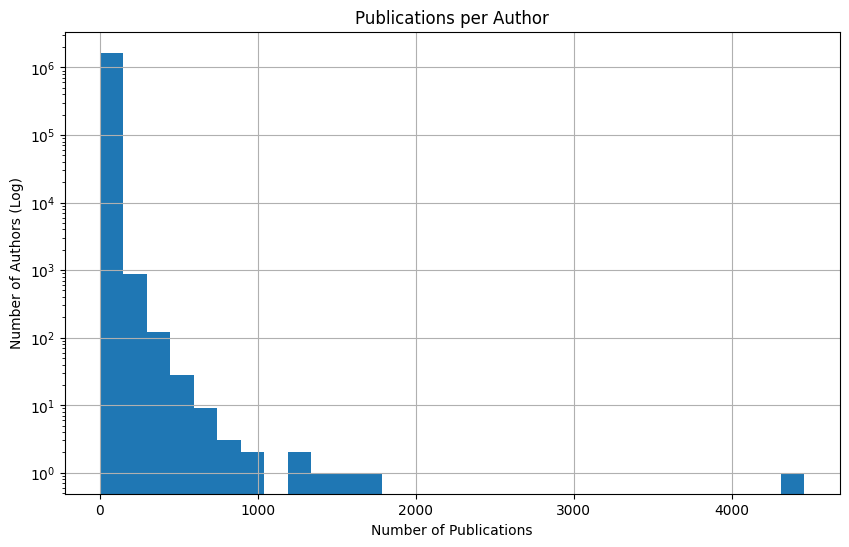

Mean - 3.454149047586491
Standard Deviation - 10.738130681552196
Q1 -  1.0
Median -  1.0
Q3 -  3.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

authors_map = {}

def plot_histogram_number_of_publications_per_authors():

    for i, row in df.iterrows():
        if pd.notna(row['Authors']) and pd.notna(row['Title']):
            authors = authors_split(row['Authors'])

            for author in authors:
                authors_map[author] = authors_map.get(author, 0) + 1

    publication_counts = list(authors_map.values())

    plt.figure(figsize=(10, 6))
    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Number of Publications')
    plt.ylabel('Number of Authors (Log)')
    plt.title('Publications per Author')
    plt.grid(True)
    plt.show()

    return publication_counts


publication_counts = plot_histogram_number_of_publications_per_authors()

There are authors like this '_ ,_ ,_' in the dataset, which is why we have that pike in the number of publications per author

# Problem 1 D

In [13]:
print("Mean -",np.mean(publication_counts))
print("Standard Deviation -",np.std(publication_counts))
print("Q1 - ",np.percentile(publication_counts,25))
print("Median - ",np.percentile(publication_counts,50))
print("Q3 - ",np.percentile(publication_counts,75))

Mean - 8.725348299479014
Standard Deviation - 106.78868370244105
Q1 -  1.0
Median -  1.0
Q3 -  1.0


# Problem 1 E

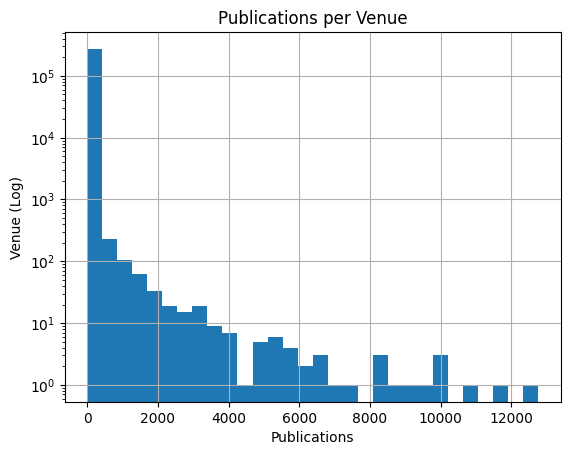

Venue with most publications: IEEE Transactions on Information Theory
Mean - 8.725348299479014
Standard Deviation - 106.78868370244105
Q1 -  1.0
Median -  1.0
Q3 -  1.0


In [14]:
import matplotlib.pyplot as plt
import numpy as np

venue_map = {}

def plot_histogram_number_of_publications_per_venue():
    df = pd.read_csv(FILE_PATH)
    
    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['Title']):
            venue = row['Venue']

            venue_map[venue] = venue_map.get(venue, 0) + 1

    publication_counts = list(venue_map.values())
    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Publications')
    plt.ylabel('Venue (Log)')
    plt.title('Publications per Venue')
    plt.grid(True)
    plt.show()

    print('Venue with most publications:', max(venue_map, key=venue_map.get))
    
    return publication_counts

publication_counts = plot_histogram_number_of_publications_per_venue()

print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

IEEE Transactions on Information Theory is the venue with the most publications


# Question F

max_citation_count and max_citation_index and title:  809 2015217 Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles


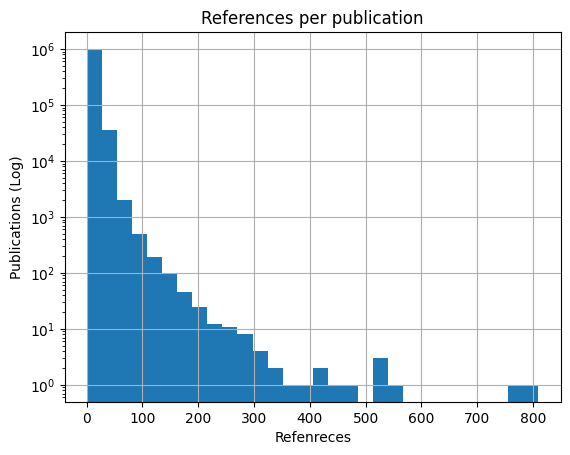

In [ ]:

def plot_histogram_number_of_references_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    references_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References']
            index = row['Index']
            
            number_of_references = len(references.split(','))
            
            references_map[index] = references_map.get(index, 0) + number_of_references
            
    max_citation_index = max(references_map, key=references_map.get)
    max_citation_count = references_map[max_citation_index]

    print('max_citation_count and max_citation_index and title: ', max_citation_count, max_citation_index, index_publication_map[str(max_citation_index)])
    publication_counts = list(references_map.values())

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Refenreces')
    plt.ylabel('Publications (Log)')
    plt.title('References per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_references_per_publication()

# Question F

max_citation_count and max_citation_index and title:  938039 2135000 INFORMS Journal on Computing


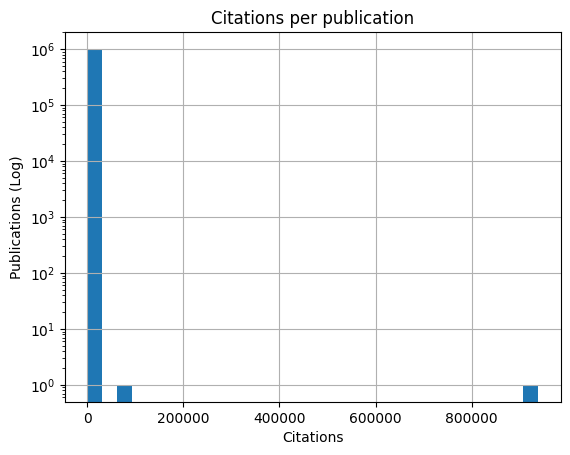

In [23]:

citations_map = {}

def plot_histogram_number_of_citations_per_publication():
    df = pd.read_csv(FILE_PATH)

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References'].strip().split(',')

            for reference in references:
                reference = reference.strip()

                citations_map[reference] = citations_map.get(reference, 0) + 1


    max_citation_index = max(citations_map, key=citations_map.get)
    max_citation_count = citations_map[max_citation_index]

    print('max_citation_count and max_citation_index and title: ', max_citation_count, max_citation_index, index_publication_map[str(max_citation_index)])
    
    publication_counts = list(citations_map.values())

    plt.hist(list(citations_map.values()), bins=30, log=True)
    plt.xlabel('Citations')
    plt.ylabel('Publications (Log)')
    plt.title('Citations per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

#inform jounel of computing

publication_counts = plot_histogram_number_of_citations_per_publication()

# Problem 1 G

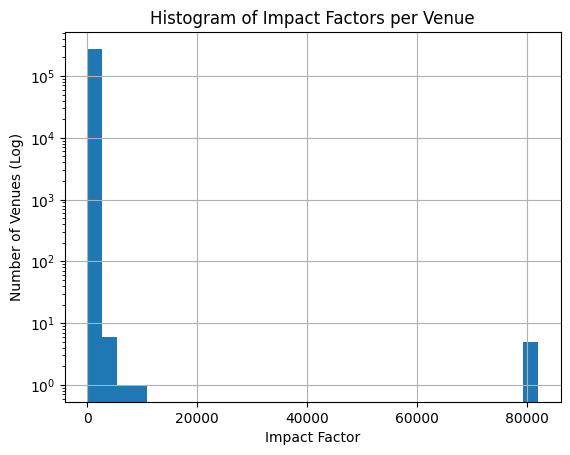

In [33]:
venue_citations_map = {}
venue_publications_map = {}

def calculate_and_plot_impact_factor(file_path):
    df = pd.read_csv(file_path)
    
    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['Index']):
            index = str(int(row['Index']))
            venue = row['Venue']
            venue_citations_map[venue] = venue_citations_map.get(venue, 0) + citations_map.get(index, 0)
            venue_publications_map[venue] = venue_publications_map.get(venue, 0) + 1

    impact_factors = {
        venue: citations / venue_publications_map[venue]
        for venue, citations in venue_citations_map.items()
    }

    impact_factor_values = list(impact_factors.values())

    plt.hist(impact_factor_values, bins=30, log=True)
    plt.xlabel('Impact Factor')
    plt.ylabel('Number of Venues (Log)')
    plt.title('Histogram of Impact Factors per Venue')
    plt.grid(True)
    plt.show()

    return impact_factors

impact_factors = calculate_and_plot_impact_factor(FILE_PATH)


# Problem 1 H

In [34]:
## find all the venues with the highest impact factor

max_impact_venue = max(impact_factors, key=impact_factors.get)

print(f"Venue with highest impact factor: {max_impact_venue}, Impact Factor: {impact_factors[max_impact_venue]}")

Venue with highest impact factor: Graphics Interface 1990, Impact Factor: 82080.0


Venue with highest impact factor: Graphics Interface 1990, Impact Factor: 82080.0
The majority of the publications have a reasonable impact factor
But there are numbers that are way outside of the normal range, which I believe doesn't make sense


# Problem 1 I

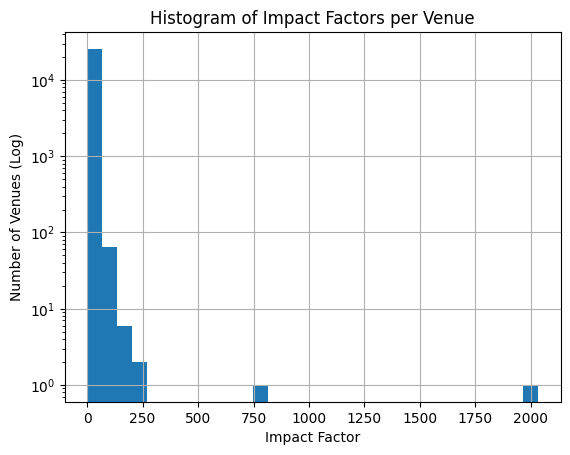

Venue with highest impact factor: Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining
Impact Factor (Mean number of citations): 2033.2029702970297
Mean number of citations: 2033.2029702970297
Median number of citations: 1.0
Citation counts: [9, 3, 1, 0, 0, 10, 0, 2, 0, 1, 0, 0, 0, 5, 0, 1, 1, 2, 3, 3, 1, 3, 1, 1, 2, 1, 0, 1, 0, 3, 0, 2, 8, 1, 3, 0, 0, 0, 1, 1, 1, 4, 0, 5, 1, 0, 0, 5, 4, 3, 0, 1, 0, 1, 1, 7, 1, 1, 1, 0, 3, 0, 2, 6, 2, 2, 2, 4, 5, 5, 2, 0, 9, 1, 3, 2, 0, 1, 3, 0, 1, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 6, 0, 3, 1, 1, 15, 1, 1, 2, 3, 4, 2, 4, 3, 0, 4, 0, 3, 2, 2, 1, 4, 10, 2, 0, 0, 2, 4, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 4, 2, 0, 1, 0, 1, 0, 0, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 8, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 82080, 82080, 82080, 82080, 82080]


In [36]:
venue_citations = {}
venue_publications = {}

def calculate_and_plot_impact_factor(file_path):
    df = pd.read_csv(file_path)
    

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['Index']):
            index = str(int(row['Index']))
            venue = row['Venue']

            venue_citations[venue] = venue_citations.get(venue, 0) + citations_map.get(index, 0)

            venue_publications[venue] = venue_publications.get(venue, 0) + 1

    impact_factors = {
        venue: citations / venue_publications[venue]
        for venue, citations in venue_citations.items() if venue_publications[venue] >= 10
    }

    impact_factor_values = list(impact_factors.values())

    plt.hist(impact_factor_values, bins=30, log=True)
    plt.xlabel('Impact Factor')
    plt.ylabel('Number of Venues (Log)')
    plt.title('Histogram of Impact Factors per Venue')
    plt.grid(True)
    plt.show()

    return impact_factors

impact_factors = calculate_and_plot_impact_factor(FILE_PATH)

max_impact_venue = max(impact_factors, key=impact_factors.get)

max_impact_venue_df = df[df['Venue'] == max_impact_venue]

citation_counts = [citations_map.get(str(index), 0) for index in max_impact_venue_df['Index']]

print(f"Venue with highest impact factor: {max_impact_venue}")
print(f"Impact Factor (Mean number of citations): {impact_factors[max_impact_venue]}")
print(f"Mean number of citations: {np.mean(citation_counts)}")
print(f"Median number of citations: {np.median(citation_counts)}")
print(f"Citation counts: {citation_counts}")


# Problem 1 J

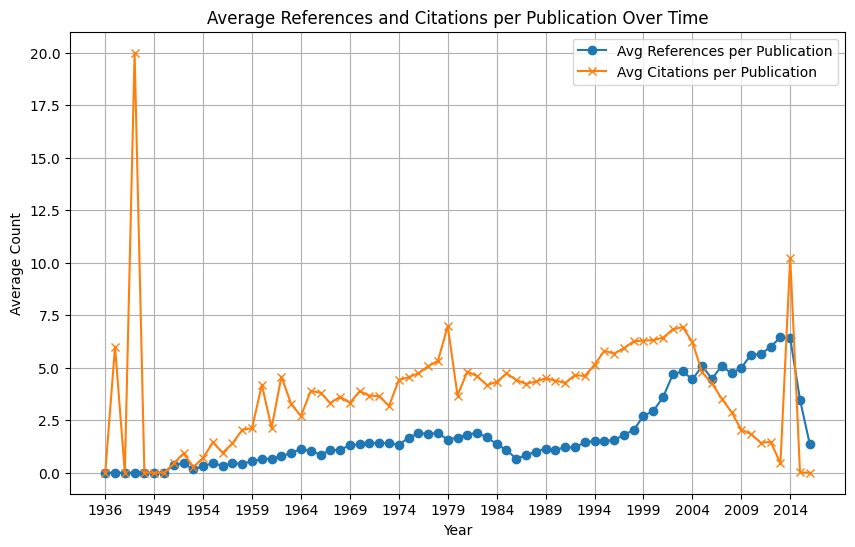

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

min_year = min(index_year_map.values())
max_year = max(index_year_map.values())
FILE_PATH = 'acm.csv'

def plot_average_references_and_citations_per_publication_per_year():
    df = pd.read_csv(FILE_PATH)

    year_publication_map = {}

    for year in range(int(min_year), int(max_year) + 1):
        year = str(year)
        year_publication_map[year] = {
            'references': 0,
            'publications': 0,
            'citations': 0
        }

    for i, row in df.iterrows():
           
        if pd.notna(row['Index']) and pd.notna(row['Year']):
            year = str(int(row['Year']))
            year_publication_map[year]['publications'] += 1

        if pd.notna(row['References']) and pd.notna(row['Index']) and pd.notna(row['Year']):

            references = row['References'].strip().split(',')
            year = str(int(row['Year']))
            
            year_publication_map[year]['references'] += len(references)

        if pd.notna(row['Index']) and pd.notna(row['References']):

            references = row['References'].strip().split(',')

            for reference in references:
                reference = reference.strip()
                
                if reference in index_year_map:
                    year_publication_map[index_year_map[reference]]['citations'] += 1       
                    

    ## if certain years have no publications, we need to remove them
    years_to_remove = []
    for year, data in year_publication_map.items():
        if data['publications'] == 0:
            years_to_remove.append(year)
    
    for year in years_to_remove:
        del year_publication_map[year]

    years = []
    avg_references = []
    avg_citations = [] 

    for year, data in sorted(year_publication_map.items()):
        years.append(year)
        avg_references.append(data['references'] / data['publications'])
        avg_citations.append(data['citations'] / data['publications'])

    plt.figure(figsize=(10, 6))
    plt.plot(years, avg_references, marker='o', label='Avg References per Publication')
    plt.plot(years, avg_citations, marker='x', label='Avg Citations per Publication')
    plt.xlabel('Year')
    plt.ylabel('Average Count')
    plt.title('Average References and Citations per Publication Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(years[::5])
    plt.show()
    plt.show()

plot_average_references_and_citations_per_publication_per_year()



Both number of references and citations are growing over the years. However the recent publications has less number of citations.
